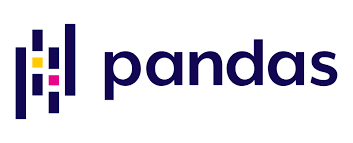

## [53] Membuat Kategori Baru Berdasarkan Treshold (ambang batas)

### [53.1] Import Module

In [1]:
import pandas as pd
print(pd.__version__)

1.0.5


### [53.2] Persiapan Data Frame
- Data frame yang dibentuk merupakan data frame yang terdiri dari 1 kolom yang berisikan nama-nama hobi
- Setiap jenis hobi akan dikelompokkan dan dihitung proporsinya

In [2]:
d = {'hobi':['jogging','mancing','renang',
            'mancing','mancing','baca','baca',
            'mancing','fotografi','mancing','camping']}
df = pd.DataFrame(d)
df

,hobi
0,jogging
1,mancing
2,renang
3,mancing
4,mancing
5,baca
6,baca
7,mancing
8,fotografi
9,mancing


### [53.3] Membuat Kategori Baru berdasarkan Treshold (ambang batas)
- Untuk menghitung jumlah kemunculan dari masing-masing kolom digunakan fungsi .value_counts()
- Untuk menghitung jumlah kemunculan dari masing-masing kolom dan ditampilkan dalam bentuk persentase maka pada parameter normalize di .value_counts diberi nilai true
- Pada variabel hobi lain, nama-nama hobi dengan persentase lebih kecil dari 10% akan digabung dan dikelompokkan dengan nama hobi lain
- Penggunaan .index pada saat pengelompokkan bertujuan untuk menyimpan label dari nama-nama hobi, bukan nilai
- Fungsi replace digunakan untuk mengganti setiap hobi yang masuk ke dalam kategori hobi lain menjadi 'lainnya'

In [3]:
df['hobi'].value_counts()

mancing      5
baca         2
renang       1
camping      1
jogging      1
fotografi    1
Name: hobi, dtype: int64

In [5]:
persentase = df['hobi'].value_counts(normalize=True)
persentase

mancing      0.454545
baca         0.181818
renang       0.090909
camping      0.090909
jogging      0.090909
fotografi    0.090909
Name: hobi, dtype: float64

In [6]:
treshold = 0.1
hobi_lain = persentase[persentase<treshold].index
hobi_lain

Index(['renang', 'camping', 'jogging', 'fotografi'], dtype='object')

In [7]:
df['hobi'] = df['hobi'].replace(hobi_lain,'lainnya')
df['hobi']

0     lainnya
1     mancing
2     lainnya
3     mancing
4     mancing
5        baca
6        baca
7     mancing
8     lainnya
9     mancing
10    lainnya
Name: hobi, dtype: object

In [8]:
df['hobi'].value_counts(normalize = True)

mancing    0.454545
lainnya    0.363636
baca       0.181818
Name: hobi, dtype: float64